# <center> <span style='color:#3c3b5f'>Introducción a Matplotlib</span></center>

Módulo 8 - Parte teórica

**Profesor Adjunto:** Mag. Bioing. Baldezzari Lucas

<p style='text-align: left;'> V2022 </p>

<hr style="border:1px solid gray"> </hr>

## <span style='color:#f06553'>Instalando Matplotlib</span>

La forma rápida y sencilla es usando *pip* desde consola.

```Python
pip install matplotlib
```

Recordar antes activar el ambiente de trabajo mediante *conda actívate miEnv*, de esta manera numpy se instalará en el ambiente de trabajo.

Si ya tenemos numpy instalado podemos ver su versión ejecutando,

```Python
import matplotlib
matplotlib.__version__
```

In [ ]:
import matplotlib
matplotlib.__version__

## <span style='color:#f06553'>¿Qué es Matplotlib?</span>

Es una librería de Python que permite crear gráficos a partir de datos guardados en listas o arrays.

Los gráficos pueden ser estáticos o incluso animados.

[Sitio oficial](https://matplotlib.org/3.5.0/index.html).
[Tutorial introductorio](https://matplotlib.org/3.5.0/tutorials/introductory/usage.html#figure-parts)
[Galería de ejemplos](https://matplotlib.org/3.5.0/gallery/index.html)

## <span style='color:#f06553'>Módulo *pyplot*</span>

El módulo [*matplotlib.pyplot*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) posee un conjunto de funciones para crear figuras, áreas de graficación dentro de una figura, graficar líneas en las áreas creadas, entre muchas otras.

Lo primero que hacemos es importar el módulo. Por convención se lo importa como *plt*.

```python
import matplotlib.pyplot as plt
``` 

*Pyplot* posee una gran variedad de métodos, entre estos encontramos algunos para hacer gráficos directamente a partir de nuestros datos sin mucho esfuerzo, por mencionar algunos comunmente utilizados,

- [*pyplot.plot()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html): Gráficos a partir de datos en el eje $x$ y el eje $y$.
- [*pyplot.hist()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html): Gráfico de histogramas.
- [*pyplot.bar*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html): Gráficos de barras verticales.
- [*pyplot.barh*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html): Gráficos de barras horizontales.
- [*pyplot.scatter*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html): Gráficos de dispersión.

Si bien estos son algunos ejemplos de gráficos en 2D, podríamos crear gráficos de superficies en 3D, espectros de Fourier, y más.

### <span style='color:#381c88'>Comando *pyplot.subplot()*</span></center>

Empecemos por mencionar el comando o método [*.subplot()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). Éste comando nos permite crear dos objetos llamados *Figure* y *Axes*. Es especialmente útil cuando queremos dar formato (*layout*) común a nuestros gráficos y al mismo tiempo crear subplots o sub imágenes a partir de un layout determinado.

- [*Figure*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html): Objeto Figura. Es quien alojará nuestros gráficos para hacerlos visibles en nuestro Sistema Operativo. Es el objeto encargado de generar el entorno gráfico de los plots que realicemos.
- [*Axes*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html): El objeto *Axes* es quien contiene los datos que utilizara pyplot para graficar. No representa los ejes desde el punto de vista matemático, sino como un *contenedor*.

El hecho de poder trabajar con los objetos *Figure* y *Axes* de manera separada nos permite tener un control total sobre cada uno de los aspectos de nuestro gráfico.

La siguiente figura es una representación de las diferentes partes que conforman un gráfico en matplotlib.

<img src="figs/anatomy.png" width=450>

Veamos como utilizar el método *.subplots()*

```python
figure, ax = plt.subplots()
``` 

Como hemos mencionado, el método *.subplots()* retorna dos objetos los cuales los almacenamos en *figure* y en *ax*, los cualres representan los objetos *Figure* y *Axes*, respectivamente.

Finalmente debemos indicar a matplotlib que queremos mostrar nuestro gráfico mediante el comando *show()*.

Veamos un ejemplo sencillo.

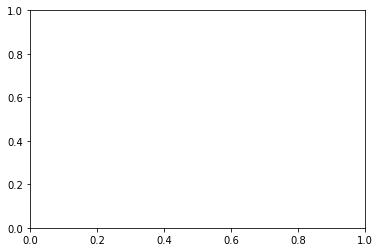

In [50]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots()
plt.show()

En el ejemplo anterior creamos un gráfico a partir de una figura y unos axes que no tenían datos, por eso vemos un recuadro en blanco.

Vamos a utilizar los datos del archivo *temperatures.csv* visto en clase de ejercitación de Pandas. Recordar que el archivo contiene los datos de las temperaturas promedios diarios para varios países desde 2000 al 20013.

In [52]:
import pandas as pd
temps = pd.read_csv("datasets/temperatures.csv")
temps

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Costa de Marfil,27.293
1,2000-02-01,Abidjan,Costa de Marfil,27.685
2,2000-03-01,Abidjan,Costa de Marfil,29.061
3,2000-04-01,Abidjan,Costa de Marfil,28.162
4,2000-05-01,Abidjan,Costa de Marfil,27.547
...,...,...,...,...
16402,2013-04-01,Xian,China,12.563
16403,2013-05-01,Xian,China,18.979
16404,2013-06-01,Xian,China,23.522
16405,2013-07-01,Xian,China,25.251


### <span style='color:#381c88'>Gráficos de línea</span></center>

Un tipo básico de gráficos es el de línea, dado por [`Axes.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html). Con el mismo podemos ralizar gráficos completos que representen la variación de una variable respecto de otra.

Su sintáxis es,

```python
Axes.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
```

Vamos a graficar la variación de temperatura promedio por cada uno de los años -desde el 2000 al 2013- para las ciudades de Chicago, Los Anteles" y "Toronto".

In [53]:
## preparo los datos
temps['date'] = pd.to_datetime(temps.date, format='%Y-%m-%d')
cities = temps["city"].isin(["Chicago","Los Angeles","Toronto"])
tablaTemps = temps[cities].pivot_table(values = "avg_temp_c", columns = temps.date.dt.year, index = "city")
tablaTemps

date,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
city,,,,,,,,,,,,,,
Chicago,11.089667,11.703083,11.532083,10.481583,10.943417,11.583833,11.870500,11.448333,10.242417,10.298333,11.815917,11.214250,12.821250,11.586889
Los Angeles,16.643333,16.466250,16.430250,16.944667,16.552833,16.431417,16.623083,16.699917,17.014750,16.677000,15.887000,15.874833,17.089583,18.120667
Toronto,6.674000,7.761667,7.482333,6.022000,6.395833,7.216750,7.846833,7.071333,6.576750,6.282583,7.774500,7.299583,8.664667,8.459444


Hemos creado una tablá pivote para almacenar los datos de temperaturas promedios para las ciudades mencioandas.

**Ejercicio**: Intente hacer lo mismo pero tome un año cualquiera y grafique la variación de temperatura pero tomando los promedios mensuales para el año seleccionado.

A partir de la tabla creada vamos a tomar los datos que usaremos para graficar.

In [59]:
years = tablaTemps.columns.tolist()
tChi = tablaTemps.loc["Chicago"].values
tLA = tablaTemps.loc["Los Angeles"].values
tTo = tablaTemps.loc["Toronto"].values

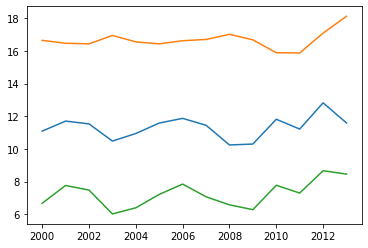

In [60]:
## Graficamos los datos en un gráfico de linea
fig, ax = plt.subplots()
ax.plot(years, tChi) #(x, y)
ax.plot(years, tLA)
ax.plot(years, tTo)
plt.show()

Podemos ver que matplotlib nos grafica cada valor de temperatura para cada año.

Veremos más adelante cómo agregar informacion al gráfico para hacer su lectura más amena, por ejemplo, podríamos agregar una *leyenda* que indique a qué ciudad corresponde cada color de linea, podríamos hacer una linea más gruesa que las otras dos, cambiar de linea sólida  auna punteada, agregar títulos, agregar marcas, y muchas cosas más.

## <span style='color:#f06553'>Customizando nuestros gráficos</span>

Cada método de graficación dentro del objeto *Axes* posee sus parámetros para darle formatos a nuestros gráficos.

Sigamos con el ejemplo de *axes.plot()* para customizar las gráficas correspondientes a las variaciones de temperatura.

#### <span style='color:#229954'>Marcadores, estilo y color de linea</span></center>

Podríamos editar tres características básicas de nuestros gráficos de linea usando algunos de los parámetros que posee *pyplot.plot()*, por ejemplo,

```python
axes.plot(x, y, marker="o", linestyle="--", color="g", label = "Etiqueta representativa")
```

En la linea de código anterior estamos diciendo a pyplot que grafique los datos $x$ vs $y$ con marcadores del tipo *o*, estilo de linea del tipo *--* y de color verde (*g*). Finalmente con *label* estamos seteando una etiqueta o nombre al subplot que acabamos de crear, esto puede ser útil cuando seteemos [*ax.legend()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) y así lograr obtener un recuadro con la leyende de nuestro gráfico.

Si prestamos atención a los datos de temperatura anuales, nos daríamos cuenta que las lineas dibujadas en realidad no son continuas, sino que unen los puntos correspondientes a los valores de temperatura para cada año. Los *marcadores* van a indicar cada uno de estos puntos.

Veamos.

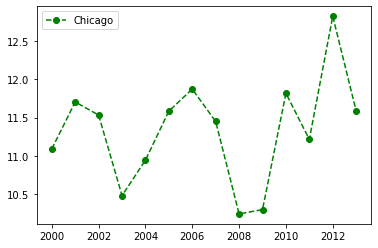

In [65]:
## graficamos la temperatura de chicago
fig, ax = plt.subplots()
ax.plot(years, tChi, marker = "o", linestyle = "--", color = "g", label = "Chicago")
ax.legend()
plt.show()

En la sección *Marker* y *Linestyle* de la documentación oficial de [*pyplot.pot()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) se muestran todos los tipos de marcadores y estilos de lineas, respectivamente, que podemos usar.

En cuanto a los colores, dentro de la documentación podemos setear algunos colores básicos, sin embargo, podríamos usar colores RGB o Hexadecimales para dar colores a nuestros gráficos.

#### <span style='color:#229954'>Agregando datos en los ejes y un título</span></center>

Ademas de modificar los estilos de linea y cómo se representan los datos podemos agregar información adicional que enriquezca nuestra figura.

En este ejemplo usaremos,

- [*Axes.set_xlabel()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html): Permite setear un valor al eje X.
- [*Axes.set_ylabel()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html): Permite setear un valor al eje Y.
- [*Axes.set_ylabel()*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html): Permite setear un título.

Veamos.

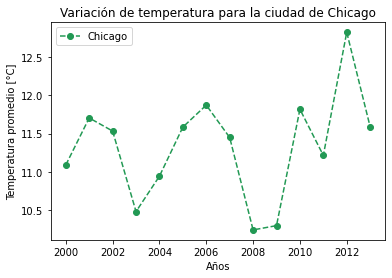

In [66]:
fig, ax = plt.subplots()
ax.plot(years, tChi, marker = "o", linestyle = "--", color = "#229954", label = "Chicago")
ax.set_xlabel("Años")
ax.set_ylabel("Temperatura promedio [°C]")
ax.set_title("Variación de temperatura para la ciudad de Chicago")
ax.legend()
plt.show()

#### <span style='color:#229954'>Graficando varias lineas</span></center>

Aprovechando que podemos customizar nuestros gráficos, agreguemos los datos de las ciduades de LA y Toronto a nuestro grpafico.

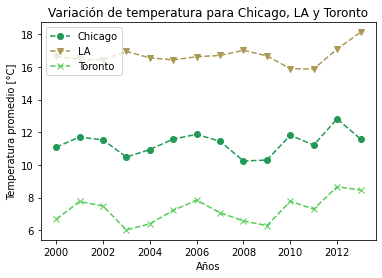

In [69]:
fig, ax = plt.subplots()

#agregando subplots
ax.plot(years, tChi, marker = "o", linestyle = "--", color = "#229954", label = "Chicago")
ax.plot(years, tLA, marker = "v", linestyle = "--", color = "#aa9954", label = "LA")
ax.plot(years, tTo, marker = "x", linestyle = "--", color = "#55cc54", label = "Toronto")

#seteando axes
ax.set_xlabel("Años")
ax.set_ylabel("Temperatura promedio [°C]")
ax.set_title("Variación de temperatura para Chicago, LA y Toronto")
ax.legend(loc = "upper left")

#generamos el gráfico
plt.show()

### <span style='color:#381c88'>Graficando en diferentes subplots</span></center>

Hasta ahora hemos graficado tres valores de temperatura anuales promedios para tres ciudades diferentes de nuestro dataset.

Supongamos que quisiéramos graficar las tres lineas en tres subplots diferentes como si fueran gráficas independientes, esto lo podemos hacer de manera sencilla.

El método *pyplot.subplots* posee su encabezado como sigue,

```python
matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
```

Donde `nrows` y `ncols` especifican la cantidad de filas y columnas que tendrá nuestro objeto Axes, y de esta manera, cuantos subplots tendremos dentro de *Figure* cuando hagamos *plt.show()*.

Veamos un ejemplo sencicllo.

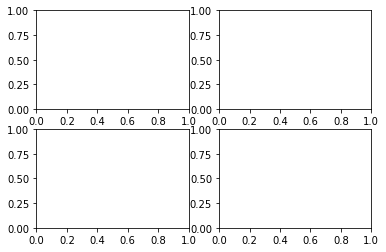

(2, 2)

In [71]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)
plt.show()
ax.shape

Vemos que logramos cuatro subplots al hacer `plt.subplots(nrows = 2, ncols = 2)` y que el shape de `ax` es `(2,2)`. Esto indica que tenemos 4 axis a las cuales le podemos cargar datos para graficar.

Ahora grafiquemos los valores de temperatura.

In [72]:
##Actualizo pivote_table y agrego los cuantiles 25 y 75
def q25(col):
    return col.quantile(0.25)

def q75(col):
    return col.quantile(0.75)

temps['date'] = pd.to_datetime(temps.date, format='%Y-%m-%d')
cities = temps["city"].isin(["Chicago","Los Angeles","Toronto"])
tablaTemps = temps[cities].pivot_table(values = "avg_temp_c", columns ="city" , index = temps.date.dt.year,
                                       aggfunc = [q25,"mean",q75])
tablaTemps

q25                            mean                             q75  \
city  Chicago Los Angeles  Toronto    Chicago Los Angeles   Toronto   Chicago   
date                                                                            
2000  6.13875    11.45750  0.34250  11.089667   16.643333  6.674000  18.21950   
2001  4.74150    11.66100 -0.70275  11.703083   16.466250  7.761667  17.76250   
2002  3.98400    12.07275 -1.94150  11.532083   16.430250  7.482333  19.51800   
2003  4.10950    11.61275 -2.40700  10.481583   16.944667  6.022000  17.09850   
2004  5.56275    10.72250 -1.35500  10.943417   16.552833  6.395833  17.81550   
2005  3.08450    12.13750 -4.13825  11.583833   16.431417  7.216750  21.21350   
2006  5.81525    11.35075 -0.46525  11.870500   16.623083  7.846833  17.67900   
2007  5.75425    13.52425 -1.95475  11.448333   16.699917  7.071333  19.48500   
2008  1.94150    12.72175 -4.01575  10.242417   17.014750  6.576750  18.77650   
2009  3.99675    11.96750 -1.82000  10.298333   16.677000  6.282583  17.85425   
2010  5.05950    11.67375  0.12175  11.815917   15.887000  7.774500  19.09850   
2011  4.86375    11.34025 -1.69275  11.214250   15.874833  7.299583  18.09100   
2012  6.85050    11.57975  1.17950  12.821250   17.089583  8.664667  18.90275   
2013  1.32300    14.46300 -1.86200  11.586889   18.120667  8.459444  19.97700   

                            
city Los Angeles   Toronto  
date                        
2000    22.09425  14.99575  
2001    22.58650  15.40325  
2002    21.90325  17.99700  
2003    21.36550  15.70025  
2004    21.54300  16.33200  
2005    19.60400  18.08400  
2006    22.54975  14.97200  
2007    21.13350  17.19925  
2008    23.18250  16.19150  
2009    21.09250  15.40500  
2010    21.14800  15.53275  
2011    20.18625  16.25825  
2012    21.76225  15.90900  
2013    23.30100  17.36700

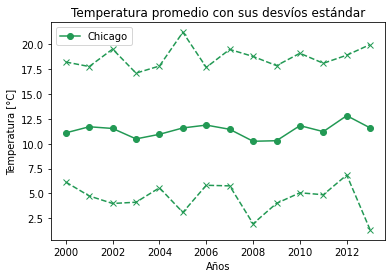

In [73]:
fig, ax = plt.subplots()

#agregando subplots
ax.plot(years, tablaTemps["q25"]["Chicago"], marker = "x", linestyle = "--", color = "#229954")
ax.plot(years, tablaTemps["mean"]["Chicago"], marker = "o", color = "#229954", label = "Chicago")
ax.plot(years, tablaTemps["q75"]["Chicago"], marker = "x", linestyle = "--", color = "#229954")

#seteando axes
ax.set_xlabel("Años")
ax.set_ylabel("Temperatura [°C]")
ax.set_title("Temperatura promedio con sus desvíos estándar")
ax.legend(loc = "upper left")

#generamos el gráfico
plt.show()

Ahora grafiquemos las variaciones promedio de temperatura para cada ciudad en una misma figura.

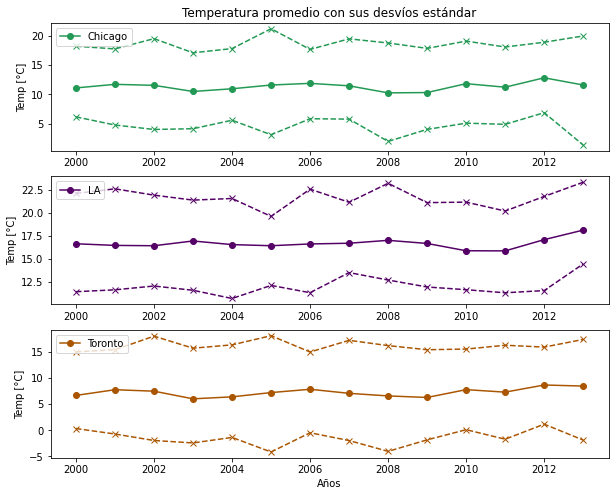

In [74]:
fig, ax = plt.subplots(3,1,figsize=(10, 8)) #3 filas, 1 columna

#agregando subplots a la primer fila
ax[0].plot(years, tablaTemps["q25"]["Chicago"], marker = "x", linestyle = "--", color = "#229954")
ax[0].plot(years, tablaTemps["mean"]["Chicago"], marker = "o", color = "#229954", label = "Chicago")
ax[0].plot(years, tablaTemps["q75"]["Chicago"], marker = "x", linestyle = "--", color = "#229954")
#seteando axes
ax[0].set_title("Temperatura promedio con sus desvíos estándar")
ax[0].set_ylabel("Temp [°C]")
ax[0].legend(loc = "upper left")

#agregando subplots a la segunda fila
ax[1].plot(years, tablaTemps["q25"]["Los Angeles"], marker = "x", linestyle = "--", color = "#540066")
ax[1].plot(years, tablaTemps["mean"]["Los Angeles"], marker = "o", color = "#540066", label = "LA")
ax[1].plot(years, tablaTemps["q75"]["Los Angeles"], marker = "x", linestyle = "--", color = "#540066")
#seteando axes
ax[1].set_ylabel("Temp [°C]")
ax[1].legend(loc = "upper left")

#agregando subplots a la tercera fila
ax[2].plot(years, tablaTemps["q25"]["Toronto"], marker = "x", linestyle = "--", color = "#aa5500")
ax[2].plot(years, tablaTemps["mean"]["Toronto"], marker = "o", color = "#aa5500", label = "Toronto")
ax[2].plot(years, tablaTemps["q75"]["Toronto"], marker = "x", linestyle = "--", color = "#aa5500")

ax[2].set_xlabel("Años")
ax[2].set_ylabel("Temp [°C]")
ax[2].legend(loc = "upper left")

#generamos el gráfico
plt.show()

**Comentario:** Si observamos los gráficos anteriores, podemos ver que los rangos en el eje $Y$ son diferentes para cada uno de ellos. Esto es porque las variaciones de temperatura son diferentes para cada ciudad. No obstante, podríamos setear el mismo rango para todos los gráficos, para esto hacemos `sharey=True` dentro de `plt.subplots()`.

Veamos.

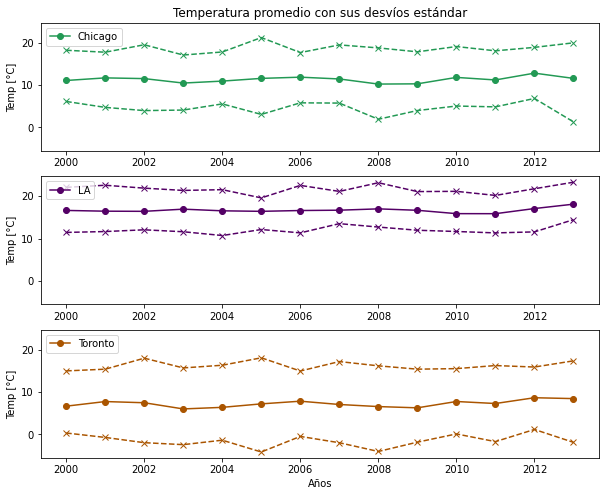

In [75]:
fig, ax = plt.subplots(3,1,figsize=(10, 8), sharey = True) #3 filas, 1 columna

#agregando subplots a la primer fila
ax[0].plot(years, tablaTemps["q25"]["Chicago"], marker = "x", linestyle = "--", color = "#229954")
ax[0].plot(years, tablaTemps["mean"]["Chicago"], marker = "o", color = "#229954", label = "Chicago")
ax[0].plot(years, tablaTemps["q75"]["Chicago"], marker = "x", linestyle = "--", color = "#229954")
#seteando axes
ax[0].set_title("Temperatura promedio con sus desvíos estándar")
ax[0].set_ylabel("Temp [°C]")
ax[0].legend(loc = "upper left")

#agregando subplots a la segunda fila
ax[1].plot(years, tablaTemps["q25"]["Los Angeles"], marker = "x", linestyle = "--", color = "#540066")
ax[1].plot(years, tablaTemps["mean"]["Los Angeles"], marker = "o", color = "#540066", label = "LA")
ax[1].plot(years, tablaTemps["q75"]["Los Angeles"], marker = "x", linestyle = "--", color = "#540066")
#seteando axes
ax[1].set_ylabel("Temp [°C]")
ax[1].legend(loc = "upper left")

#agregando subplots a la tercera fila
ax[2].plot(years, tablaTemps["q25"]["Toronto"], marker = "x", linestyle = "--", color = "#aa5500")
ax[2].plot(years, tablaTemps["mean"]["Toronto"], marker = "o", color = "#aa5500", label = "Toronto")
ax[2].plot(years, tablaTemps["q75"]["Toronto"], marker = "x", linestyle = "--", color = "#aa5500")

ax[2].set_xlabel("Años")
ax[2].set_ylabel("Temp [°C]")
ax[2].legend(loc = "upper left")

#generamos el gráfico
plt.show()

Finalmente podríamos setear los rangos en el eje $Y$ utilizando `Axes.set_ylim(y1,y2)`

¡Pruébelo usted mismo/a!

In [ ]:
## TODO Axes.set_ylim(y1,y2)

#### <span style='color:#D4AC0D'>Agregando información del desvío estándar en las gráficas.</span></center>

Algo interesante que podemos hacer sobre nuestros gráficos es agregar información del desvío estándar en cada punto de las mismas.

En el caso de gráficos de linea, debemos usar el método [*pyplot.errorbar*](matplotlib.pyplot.errorbar). Luego seteamos el parámetro `yerr`. En el mismo podemos especificar qué datos usar para dibujar las *error bar*.

Veamos un ejemplo.

In [76]:
## obtenemos las medias y los los desvíos estándar para las ciudades dentro de nuestras tablas 
tablaTemps = temps[cities].pivot_table(values = "avg_temp_c", columns ="city" , index = temps.date.dt.year,
                                       aggfunc = ["mean","std"])
tablaTemps

mean                             std                       
city    Chicago Los Angeles   Toronto   Chicago Los Angeles    Toronto
date                                                                  
2000  11.089667   16.643333  6.674000  8.528791    5.559957   9.957555
2001  11.703083   16.466250  7.761667  8.114507    6.276874   9.636590
2002  11.532083   16.430250  7.482333  8.342156    5.645399   9.882517
2003  10.481583   16.944667  6.022000  8.590418    6.207233  10.808517
2004  10.943417   16.552833  6.395833  8.069507    5.737110  10.376591
2005  11.583833   16.431417  7.216750  9.157208    5.339027  11.300847
2006  11.870500   16.623083  7.846833  7.388433    6.353465   9.322290
2007  11.448333   16.699917  7.071333  9.099282    5.898528  10.810993
2008  10.242417   17.014750  6.576750  9.009234    6.237923  10.182531
2009  10.298333   16.677000  6.282583  8.342997    5.982407   9.958303
2010  11.815917   15.887000  7.774500  9.043660    5.402819  10.392825
2011  11.214250   15.874833  7.299583  8.649611    5.808336  10.679270
2012  12.821250   17.089583  8.664667  7.653644    6.104565   9.193720
2013  11.586889   18.120667  8.459444  9.499595    6.186685  10.699050

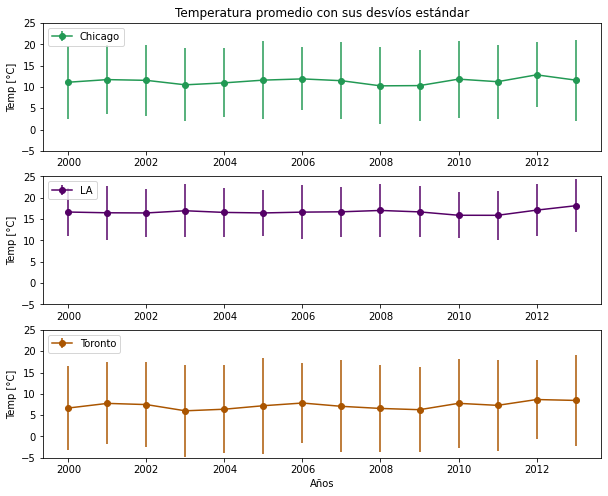

In [77]:
## graficamos para las ciudades dentro de nuestro set de datso

fig, ax = plt.subplots(3,1,figsize=(10, 8), sharey = True) #3 filas, 1 columna

#agregando subplots a la primer fila
ax[0].errorbar(years, tablaTemps["mean"]["Chicago"], marker = "o", color = "#229954", label = "Chicago",
            yerr = tablaTemps["std"]["Chicago"].values)
#seteando axes
ax[0].set_title("Temperatura promedio con sus desvíos estándar")
ax[0].set_ylabel("Temp [°C]")
ax[0].set_ylim(-5,25)
ax[0].legend(loc = "upper left")

#agregando subplots a la segunda fila
ax[1].errorbar(years, tablaTemps["mean"]["Los Angeles"], marker = "o", color = "#540066", label = "LA",
              yerr = tablaTemps["std"]["Los Angeles"].values)
#seteando axes
ax[1].set_ylabel("Temp [°C]")
ax[1].set_ylim(-5,25)
ax[1].legend(loc = "upper left")

#agregando subplots a la tercera fila
ax[2].errorbar(years, tablaTemps["mean"]["Toronto"], marker = "o", color = "#aa5500", label = "Toronto",
              yerr = tablaTemps["std"]["Toronto"].values)

ax[2].set_xlabel("Años")
ax[2].set_ylabel("Temp [°C]")
ax[2].set_ylim(-5,25)
ax[2].legend(loc = "upper left")

#generamos el gráfico
plt.show()

Claramente la ciudad de Los Ángeles es quien posee el mínimo desvío estándar.

## <span style='color:#f06553'>Graficando series temporales</span>

En ocasiones podríamos necesitar graficar variaciones de uno o más parámetros respecto del tiempo. Matplotlib tiene la característica de que puede operar con variables del tipo *date*, como el que podríamos tener en un DataFrame de Pandas.

Para poder aprovechar toda la funcionalidad que ofrece Matplotlib en el manejo de series temporales dentro de un DataFrame es necesario que la columna que contenga los datos este correctamente seteada como *date*, por ejemplo podríamos hacer, `temps['date'] = pd.to_datetime(temps.date, format='%Y-%m-%d')`.

Sigamos con el ejemplo de variación de temperaturas.

Grafiquemos la variación de temperatura de Sydney en todo el rango de datos disponible

In [81]:
## Seteamos las fechas cmo los índices del dataframe para facilitar el ejemplo
temps.set_index("date", inplace = True)

KeyError: "None of ['date'] are in the columns"

In [83]:
temps.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='date', length=16407, freq=None)

Ahora vamos a quedarnos solamente con los datos de Sydney desde el 2000 al 2013 (todos los datos)

In [84]:
sydney = temps["2000":"2013"][temps["city"] == "Sydney"]
sydney

,city,country,avg_temp_c
date,,,
2000-01-01,Sydney,Australia,18.470
2000-02-01,Sydney,Australia,20.713
2000-03-01,Sydney,Australia,20.220
2000-04-01,Sydney,Australia,18.602
2000-05-01,Sydney,Australia,16.614
...,...,...,...
2013-04-01,Sydney,Australia,18.547
2013-05-01,Sydney,Australia,16.947
2013-06-01,Sydney,Australia,15.911


Ahora vamos a graficar la variación de temperatura desde el 2000 al 2013.

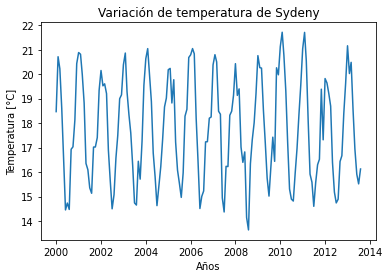

In [85]:
## Creamos gráficos
fig, ax = plt.subplots()
ax.plot(sydney["2000":"2013"].index, sydney["2000":"2013"]["avg_temp_c"])
ax.set_xlabel("Años")
ax.set_ylabel("Temperatura [°C]")
ax.set_title("Variación de temperatura de Sydeny")

plt.show()

Ahora vamos a graficar la variación de temperatura desde los años 2011 al 2013

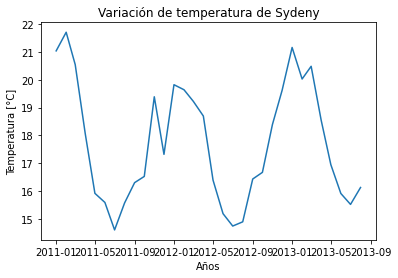

In [86]:
## Creamos gráficos
fig, ax = plt.subplots()
ax.plot(sydney["2011":"2013"].index, sydney["2011":"2013"]["avg_temp_c"])
ax.set_xlabel("Años")
ax.set_ylabel("Temperatura [°C]")
ax.set_title("Variación de temperatura de Sydeny")

plt.show()

Ahora vamos a graficar la variación de temperatura correspondiente al año 2013

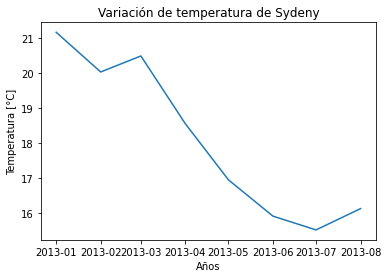

In [90]:
## Creamos gráficos
fig, ax = plt.subplots()
ax.plot(sydney["2013":"2013"].index, sydney["2013":"2013"]["avg_temp_c"])
ax.set_xlabel("Años")
ax.set_ylabel("Temperatura [°C]")
ax.set_title("Variación de temperatura de Sydeny")

plt.show()

**Comentario**:

Vemos que Matplotlib es quien se encarga de acomodar el rango de valores en el eje X dependiendo de cuantas fechas debe mostrar.

## <span style='color:#f06553'>Gráficas con diferenes escalas</span></center>

Podríamos necesitar insertar en una misma gráfica, la variación temporal de dos eventos los cuales poseen magnitudes diferentes. En estos casos podría ser útil que el eje Y del lado izquierdo haga referencia al rango de un dato, mientras que el lado derecho haga referencia a otro dato, pero que compartar el mismo eje X.

Para lograr lo anterior se utiliza el método `Axes.twinx()`, el cual toma el eje X del Axes actual y se lo asigna a un nuevo objeto Axes, dándonos la posibilidad de agregar un nuevo subplot.

Veamos un ejemplo.

Utilizaremos un set de datos que contiene los registros de temperatura relativas, $CO_2$, entre otros, tomados todos los días 6 de cada mes desde el año 1936 hasta el 2008.

Los valores de temperatura relativa registrados son la diferencia en grados Celcius entre la temperatura promedio a nivel global en el período de registro y un valor de referencia. Por otro lado, los valores de $CO_2$ representan la concentración del gas en la atmósfera expresado en partes por millon. Estos datos fueron obtenidos de *ESRL/NOAA Global Monitoring Division.*

Carguemos el archivo y veamos que contiene.

In [91]:
import pandas as pd
cambioClima = pd.read_csv("datasets/climateChange.csv", parse_dates=["date"],index_col=["date"])
cambioClima

,co2,tempRelativa
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
...,...,...
2016-08-06,402.27,0.98
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89


Grafiquemos en un mismo gráfico los valores de temperatura y concentración de $CO_2$.

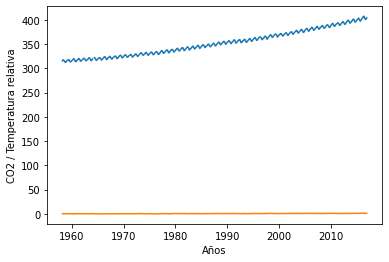

In [93]:
fig, ax = plt.subplots()
ax.plot(cambioClima.index, cambioClima["co2"])
ax.plot(cambioClima.index, cambioClima["tempRelativa"])
ax.set_xlabel("Años")
ax.set_ylabel("CO2 / Temperatura relativa")
plt.show()

Hemos logrado poner en el mismo gráfico los valores de concentración de $CO_2$ y de temperatura relativa. Sin embargo, los valores de temperatura relativa parece una linea recta.

Esto sucede porque el rango y escala de la temperatura es diferente al de la concentración de dióxido de carbono.

Veamos como solucionar esto con `Axes.twinx()`.

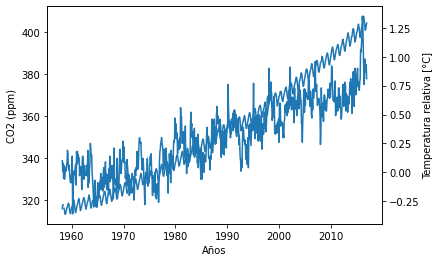

In [94]:
fig, ax = plt.subplots()
ax.plot(cambioClima.index, cambioClima["co2"])
ax.set_xlabel('Años')
ax.set_ylabel('CO2 (ppm)')
ax2 = ax.twinx()
ax2.plot(cambioClima.index, cambioClima["tempRelativa"])
ax2.set_ylabel('Temperatura relativa [°C]')
plt.show()

Ahora tenemos una gráfica que nos muestra la variación de dos variables que poseen diferentes rangos. En el eje Y del lado izquierdo peude verse la concentración de $CO_2$, mientras que del lado derecho puede verse la variación de la temperatura relativa.

Sigamos dando formato a nuestro gráfico para hacerlo mas ¡fachero!

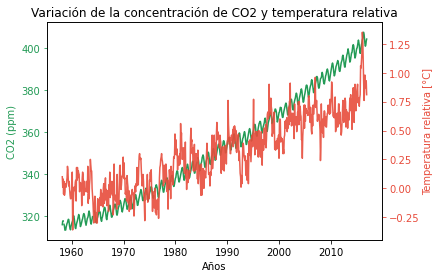

In [95]:
fig, ax = plt.subplots()
ax.plot(cambioClima.index, cambioClima["co2"], color = "#239B56", label = "CO2")
ax.set_xlabel('Años')
ax.set_ylabel('CO2 (ppm)', color = "#239B56")
# ax.legend(bbox_to_anchor=(0.21, -0.1, 0., 1))
ax.tick_params('y', colors="#239B56")
ax.set_title("Variación de la concentración de CO2 y temperatura relativa")

## Nuevo eje Y
ax2 = ax.twinx() ## copiamos el eje X del objeto ax creado previamente y lo asignamos a un nuevo objeto Axes
ax2.plot(cambioClima.index, cambioClima["tempRelativa"], color = "#E74C3C", label = "Temp. Rel.", alpha = 0.9)
ax2.set_ylabel('Temperatura relativa [°C]', color = "#E74C3C")
# ax2.legend(bbox_to_anchor=(0.3, 0., 0.0, 1))
ax2.tick_params('y', colors="#E74C3C")

plt.show()

Prestar atención que hemos dado color a los *ticks* de los ejes mediante `ax.tick_params`. Esto nos permite discriminar por colores los valores tanto de $CO_2$ como los de temperatura relativa.

### <span style='color:#381c88'>No repitamos código</span></center>

En ocasiones cuando tenemos que realizar muchas gráficas en donde el código para graficar es igual, salvo los datos que le pasamos al módulo de graficación, es útil definir una función que tome los datos que queremos graficar, y eventualmente algunos parámetros de customización, y usarla para graficar nuestros datos.

Veamos.

In [ ]:
def grafTemp(axes, x, y, xlabel = None, ylabel = None, color = None, label = None):
    axes.plot(x, y, color = color, label = label)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params('y', colors=color)

## <span style='color:#f06553'>Anotaciones sobre nuestros gráficos</span>

¿Qué tal si quisieramos remarcar o señalar algo en nustros gráficos? Matplotlib nos da la posibilidad de customizar nuestros gráficos mediante anotaciones. Para esto usamos el método [*Axes.annotate()*](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html).

El método nos permite generar anotaciones en una posición $xy$ con un texto. El encabezado del método es,

```python
Axes.annotate(text, xy, *args, **kwargs)
```

Supongamos que queremos señalar el punto en donde la temperatura relativa aumentó en $1°C$ respecto de la temperatura de referencia dentro del set de datos que venimos trabajando.

In [96]:
## Primero encontramos el punto (fecha y temperatura) donde la temperatura aumenta por encima de 1°C.
mayores1c = cambioClima[cambioClima["tempRelativa"]>1]

fecha = mayores1c.index[0] ##primer fecha donde la temperatura aumenta por encima de 1°C
temp = mayores1c.loc[fecha]["tempRelativa"] ## me quedo con la temperatura correspondiente a la fecha seleccionada
fecha

Timestamp('2015-10-06 00:00:00')

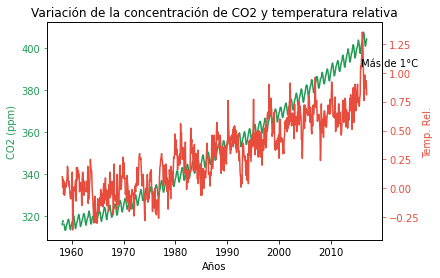

In [97]:
## Agregando anotaciones
fig, ax = plt.subplots()
grafTemp(ax, cambioClima.index, cambioClima["co2"],
         xlabel = 'Años', ylabel = 'CO2 (ppm)', color = "#239B56", label = "CO2")
ax.set_title("Variación de la concentración de CO2 y temperatura relativa")

## Nuevo eje Y
ax2 = ax.twinx() ## copiamos el eje X del objeto ax creado previamente y lo asignamos a un nuevo objeto Axes
grafTemp(ax2, cambioClima.index, cambioClima["tempRelativa"],
         xlabel = 'Años', ylabel = 'Temp. Rel.', color = "#E74C3C", label = "Temp. Rel.")

## Usamos ax2
##
ax2.annotate("Más de 1°C", xy=(pd.Timestamp(fecha), temp))

plt.show()

Podemos ver que ahora tenemos una anotación sobre la parte superior derecha de nuestro gráfico con el texto que hemos introducido dentro de *ax2.annotate()*. Por otro lado, mediante el atributo  *xy* hemos posicionado el texto en la fecha "2015-10-06" y temperatura 1.06°C. Sin embargo, podemos ver que la posición del texto no es la mejor. 

Podemos especificar una posición diferente del texto con el atributo *xytext* y agregar una flecha que señale el punto en cuestión.

Veamos.

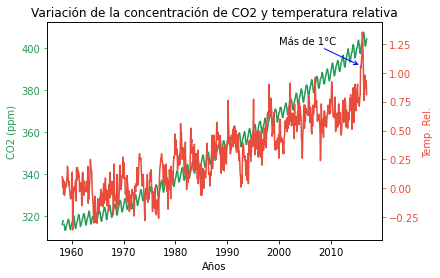

In [98]:
## Agregando anotaciones
fig, ax = plt.subplots()
grafTemp(ax, cambioClima.index, cambioClima["co2"],
         xlabel = 'Años', ylabel = 'CO2 (ppm)', color = "#239B56", label = "CO2")
ax.set_title("Variación de la concentración de CO2 y temperatura relativa")

## Nuevo eje Y
ax2 = ax.twinx() ## copiamos el eje X del objeto ax creado previamente y lo asignamos a un nuevo objeto Axes
grafTemp(ax2, cambioClima.index, cambioClima["tempRelativa"],
         xlabel = 'Años', ylabel = 'Temp. Rel.', color = "#E74C3C", label = "Temp. Rel.")

## Usamos ax2
##
ax2.annotate("Más de 1°C", xy=(pd.Timestamp(fecha), temp),
             xytext=(pd.Timestamp('2000-01-06'), 1.25), arrowprops={"arrowstyle":"->", "color":"blue"})

plt.show()

Podríamos usar no solo una flecha, sino también un circulo, un rectángulo, un textbox y muchas otras cosas más para realizar anotaciones. Incluso, podríamos tener varias anotaciones sobre un mismo gráfico.

Para conocer más sobre anotaciones pueden referenciarse en https://matplotlib.org/2.0.2/users/annotations.html.

## <span style='color:#f06553'>Comparaciones cuantitativas</span>

Es habitual tener datos del tipo categóricos. A continuación crearemos algunos gráficos útiles para el análisis de este tipo de datos.

Para conocer más acerca de variables categóricas y numéricas, acceder [acá](https://www.diferenciador.com/tipos-de-variables/).

### <span style='color:#381c88'>Gráficos de barras</span></center>

A continuación veremos cómo crear gráficos de barras y barras apiladas. En clases anteriores pudimos realizar gráficos de barras sobre nuestros dataframe usando  `DataFrame.plot(kind = "bar", datos...)` o bien `DataFrame.bar(datos...)`. Ahora utilizaremos la librería Matplotlib para crear gráficos de barras apilados, conocidos también como *stacked bar plots*.

Estos gráficos son especialmente útiles cuando queremos realizar comparaciones *cuantitativas* entre variables *categóricas*.

Veamos un ejemplo con un pequeño set de datos correspondiente a la cantidad de medallas ganadas por algunos países participantes de los Juegos Olímpicos 2016. 

In [99]:
## cargamos y analizamos el dataset
medallas = pd.read_csv("datasets/medallas.csv", index_col = 0)
medallas

,bronce,oro,plata
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


El dataset es pequeño, pero aún así puede ser complicado sacar conclusiones acerca de cuales fueron los países con mayor cantidad de medallas divididos por Oro, Plata y Bronce.

**Importante**: Notar que hemos hecho `index_col = 0` al leer el archivo mediante `pd.read_csv()` para indicarle a Pandas que los índices del dataframe sean tomados a partir de la columna cero, la cual contiene los nombres de los países.

Utilicemos un gráfico de barras para analizar nuestros datos utilizando [`pyplot.bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

```python
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
```

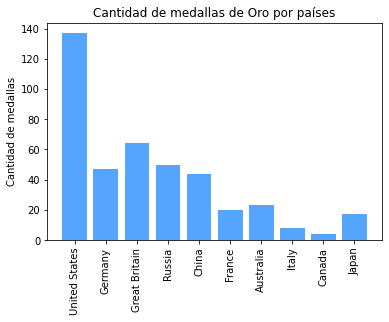

In [100]:
## Creando gráfico

fig, ax = plt.subplots()
ax.bar(medallas.index, medallas["oro"], color = "#55a5ff")
ax.set_xticks([index for index in medallas.index]) ##sin esta linea nos arroja un warning
ax.set_xticklabels(medallas.index, rotation=90)
ax.set_ylabel("Cantidad de medallas")
ax.set_title("Cantidad de medallas de Oro por países")
plt.show()

Presntar atención al parámetro `rotation=90` dentro dl método `set_xticklabels`. Esto nos permite rotar las etiquetas del eje x de tal manera de que los nombres queden a 90° y así no se superpongan dentro del grágico, cosa que pasaría si la rotación fuera de cero grados como es por defecto.

Ahora realicemos un gráfico de barras apilados donde podamos ver las medallas de oro, plata y bronce por cada país.

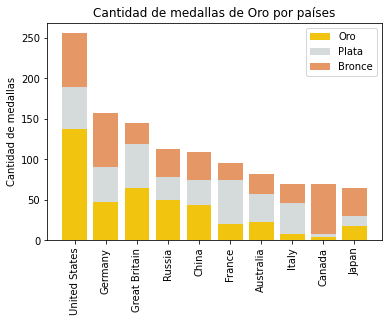

In [101]:
fig, ax = plt.subplots()

## agregamos las medallas de oro
ax.bar(medallas.index, medallas["oro"], color = "#F1C40F", label = "Oro")
## agregamos las medallas de plata
ax.bar(medallas.index, medallas["plata"], bottom=medallas["oro"], color = "#D5DBDB", label = "Plata")
## agregamos las medallas de bronce
ax.bar(medallas.index, medallas["bronce"], bottom=medallas["oro"] + medallas["plata"], color = "#E59866", label = "Bronce")

ax.set_xticks([index for index in medallas.index]) ##sin esta linea nos arroja un warning
ax.set_xticklabels(medallas.index, rotation=90)
ax.set_ylabel("Cantidad de medallas")
ax.set_title("Cantidad de medallas de Oro por países")
plt.legend()
plt.show()

Pretar atención que dentro del método `ax.bar()` hemos usado el atributo `bottom=` para indicarle a Matplotlib qué datos deben ir *por debajo* del nuevo grupo de datos a plotear como barras.

También hemos cambiado de color a cada gráfica y agregado un label. Luego con `plt.legend()` activamos un recuadro para mostrar la leyenda cuyos valores se corresponden con los  *labels* de cada gráfica de barra.

### <span style='color:#381c88'>Histogramas</span></center>

Con matplotlib también podemos crear histogramas. Estas gráficas son útiles para ver la distribución de una variable (o varias) en nuestro set de datos.


El método para crear histogramas es [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) y su encabezado esta dado cómo,

```python
matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
```

Un parámetro importante es `bins` el cual especifica de que ancho deben ser las "barras" que formarán el histograma, es decir, con *bins* podemos especificar en cuantos *trozos* o *rangos* vamos a dividir los datos para que sean representados en el histograma.

Veamos un ejemplo con un set de datos que contiene información de atletas de los JJOO 2016.

In [102]:
## Cargamos el archivo
atletas = pd.read_csv("datasets/resumen2016.csv")
atletas

,id,nombre,sex,edad,altura,peso,equipo,NOC,juegos,year,temporada,ciudad,deporte,evento,medalla
0,62,Giovanni Abagnale,M,21,198,90,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,65,Patimat Abakarova,F,21,165,49,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,73,Luc Abalo,M,31,182,86,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,250,Saeid Morad Abdevali,M,26,170,80,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,455,Denis Mikhaylovich Ablyazin,M,24,161,62,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,134857,Zhu Ting,F,21,198,78,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Gold
2010,135132,Bojana ivkovi,F,28,186,72,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Silver
2011,135205,Shakhobiddin Shokirovich Zoirov,M,23,169,52,Uzbekistan,UZB,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Flyweight,Gold
2012,135245,Milenko Zori,M,27,179,73,Serbia,SRB,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Silver


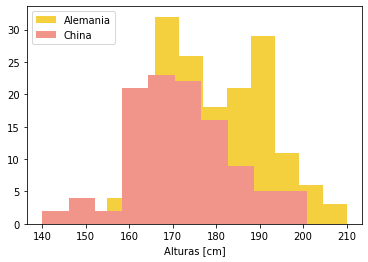

In [103]:
## Histograma de alturas entre Alemania y China

fig, ax = plt.subplots()
ax.hist(atletas[atletas["equipo"]=="Germany"]["altura"], label = "Alemania", color = "#F4D03F")
ax.hist(atletas[atletas["equipo"]=="China"]["altura"], label = "China", color = "#F1948A")
ax.set_xlabel("Alturas [cm]")
ax.set_ylabel("")
plt.legend()
plt.show()

#### <span style='color:#D4AC0D'>Modificando bins y transparencia de nuestros histogramas</span></center>

En el gráfico anterior vemos que los datos se solapan, podríamos hacer que el histograma de China sea levemente transparente modificando el atributo `alpha` el cual por defecto es 1.

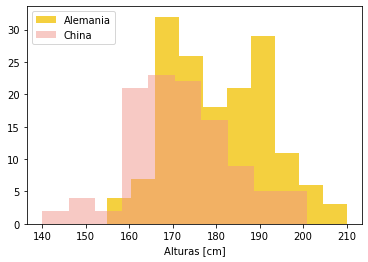

In [104]:
fig, ax = plt.subplots()
ax.hist(atletas[atletas["equipo"]=="Germany"]["altura"], label = "Alemania", color = "#F4D03F")
ax.hist(atletas[atletas["equipo"]=="China"]["altura"], label = "China", color = "#F1948A", alpha = 0.5)
ax.set_xlabel("Alturas [cm]")
ax.set_ylabel("")
plt.legend()
plt.show()

Otra posibilidad es graficar solamente los contornos de ambos histogramas mediante `histtype = "step"` dentro de `plt.hist()`.

Veamos.

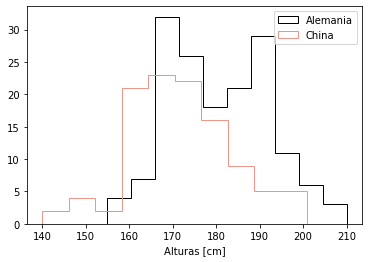

In [106]:
fig, ax = plt.subplots()
ax.hist(atletas[atletas["equipo"]=="Germany"]["altura"], label = "Alemania", color = "#000000", histtype = "step")
ax.hist(atletas[atletas["equipo"]=="China"]["altura"], label = "China", color = "#F1948A", histtype = "step")
ax.set_xlabel("Alturas [cm]")
ax.set_ylabel("")
plt.legend()
plt.show()

Tanto con transparencia como usando contornos podemos discrminiar los datos entre Alemania y China en aquellas alturas donde se solapan los datos.

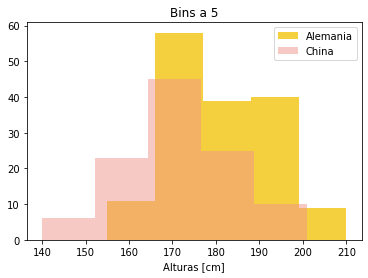

In [107]:
## Modificando los bins a 5
fig, ax = plt.subplots()
ax.hist(atletas[atletas["equipo"]=="Germany"]["altura"], label = "Alemania", color = "#F4D03F", bins = 5)
ax.hist(atletas[atletas["equipo"]=="China"]["altura"], label = "China", color = "#F1948A", alpha = 0.5, bins = 5)
ax.set_xlabel("Alturas [cm]")
ax.set_ylabel("")
ax.set_title("Bins a 5")
plt.legend()
plt.show()

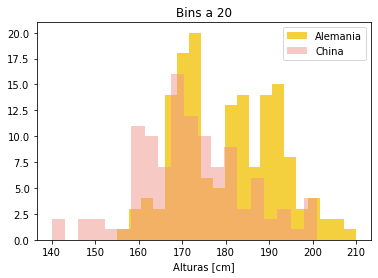

In [108]:
## Modificando los bins a 20
fig, ax = plt.subplots()
ax.hist(atletas[atletas["equipo"]=="Germany"]["altura"], label = "Alemania", color = "#F4D03F", bins = 20)
ax.hist(atletas[atletas["equipo"]=="China"]["altura"], label = "China", color = "#F1948A", alpha = 0.5, bins = 20)
ax.set_xlabel("Alturas [cm]")
ax.set_ylabel("")
ax.set_title("Bins a 20")
plt.legend()
plt.show()

Por defecto el número de bins es de 10. Vemos que al modificarlo podemos discrminar más o menos entre los valores de altura de nuestro set de datos. Uno podría preguntarse, ¿cuál es el valor óptimo de bins? Eso depende del rango de nuestros datos, la cantidad de datos entre rangos y que tanto queremos "discrminiar" entre valores.

A modo de ejemplo, al usar `bins = 5` no hay espacio en blanco entre las alturas 140cm y 150cm. Sin embargo, con `bins = 20` vemos un espacio en blanco entre los datos 140cm y 150cm (no tenemos atletas con alturas dentro de ese rango para los países analizados).

*Comentario*: Una diferencia fundamental entre un gráfico de barras y un histograma es que el histograma nos muestra la distribución completa de los datos para una categoría en particular.

#### <span style='color:#D4AC0D'>Desvíos estándar sobre gráficos de barra</span></center>

Podemos dibujar *error bar* en nuestros gráficos de barra, para esto usamos el parámetro `yerr` dentro de `plt.bar()`.

In [109]:
## graficando las alturas promedios y los std para China y Alemania
mediaYstd = atletas[atletas["equipo"].isin(["Germany", "China"])].pivot_table(values = "altura", index = "equipo",
                                                                  aggfunc = ["mean","std"])
mediaYstd.iloc[:,1]

equipo
China      12.009673
Germany    11.498265
Name: (std, altura), dtype: float64

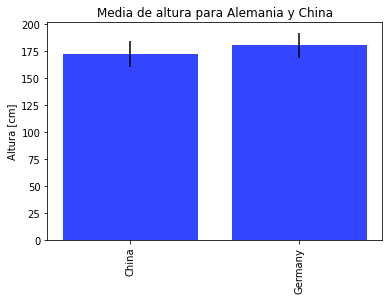

In [110]:
fig, ax = plt.subplots()
ax.bar(mediaYstd.index, mediaYstd.iloc[:,0].values, color = "#3345ff", yerr = mediaYstd.iloc[:,1])
ax.set_xticks([index for index in mediaYstd.index]) ##sin esta linea nos arroja un warning
ax.set_xticklabels(mediaYstd.index, rotation=90)
ax.set_ylabel("Altura [cm]")
ax.set_title("Media de altura para Alemania y China")
plt.show()

## <span style='color:#f06553'>Diagramas de cajas o *Boxplots*</span>

Según [Wikipedia](https://es.wikipedia.org/wiki/Diagrama_de_caja),

> Un diagrama de caja (también, diagrama de caja y bigotes o box plot) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos, y también pueden representarse sus valores atípicos. Conviene recordar que se utilizan las bisagras de Tukey, y no los cuartiles, a la hora de dibujar la caja del gráfico, aunque los resultados son semejantes en muestras grandes.

Otro artículo interesante para entender los diagrama de cajas es el titulado [*Understanding Boxplots*](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

Este tipo de gráficos son sumamente útiles para ver rápidamente como se distribuyen nuestros datos utilizando valores medios y cuantiles.

En matplotlib el método que nos permite realizar este tipo de gráficos es [`plt.boxplot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

 ```python
matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
```

Veamos cómo utilizarlos con nuestros datos.

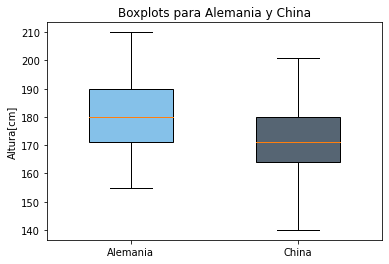

In [113]:
fig, ax = plt.subplots()

atletasGer = atletas[atletas["equipo"] == "Germany"]["altura"]
atletasChin = atletas[atletas["equipo"] == "China"]["altura"]

box = ax.boxplot([atletasGer,atletasChin], widths = 0.5, patch_artist = True, showbox = True, showfliers = True,
          showmeans = False)
ax.set_xticklabels(["Alemania", "China"])
ax.set_ylabel("Altura[cm]")
ax.set_title("Boxplots para Alemania y China")

colors = ["#85C1E9","#566573"]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

**Comentario importante**

Para poder graficar los boxplots debemos pasarle a `ax.boxplot` una lista con los datos que se usarán para realizar los diagramos de caja. En el ejemplo anterior hicimos `ax.boxplot([atletasGer,atletasChin]...)` donde `[atletasGer,atletasChin]` es una lista con los valores de altura para Alemania y China, respectivamente.

## <span style='color:#f06553'>Gráficos de dispersión o *scatter plot*</span>

Un gráfico de dispersión o *scatter plot* nos sirve para representar y relacionar variables numéricas. Cada punto dentro del scatter plot ocupa una posición en el espacio cartesiano con coordenadas $(x,y)$. Los gráficos de dispersión también suelen llamarse como *gráficos bi-variables*.

Matplitlib nos ofrece [`Axes.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html).

Los gráficos de dispersión son utilizados para observar relaciones entre variables.

El encabezado del método para realizar gráficos de dispersión esta dado por,

```python
Axes.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
```

Debemos pasarle los valores de $x$ e $y$, es decir, los valores correspondientes a las corrdenadas en $x$ e $y$.

Tomemos los datos que hemos venido usando y realicemos algunas gráficas.

#### <span style='color:#D4AC0D'>Relación entre altura y edad para Italia</span></center>

Realicemos un gráfico de dispersión para ver la relación entre altura y peso para el equipo italiano de los JJOO 2016.

In [114]:
## nos quedamos con los
italia = atletas[atletas["equipo"].isin(["Italy"])][["peso","altura"]]

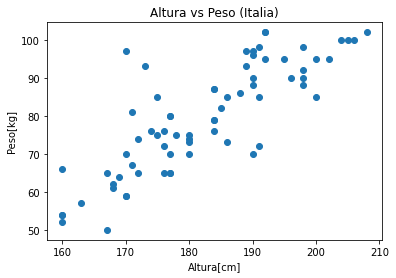

In [115]:
fig, ax = plt.subplots()

ax.scatter(italia["altura"],italia["peso"], label = "Italia")
ax.set_xlabel("Altura[cm]")
ax.set_ylabel("Peso[kg]")
ax.set_title("Altura vs Peso (Italia)")
plt.show()

Grafiquemos ahora para dos equipos diferentes.

In [116]:
italia = atletas[atletas["equipo"].isin(["Italy"])][["peso","altura"]]
rusia = atletas[atletas["equipo"].isin(["Russia"])][["peso","altura"]]

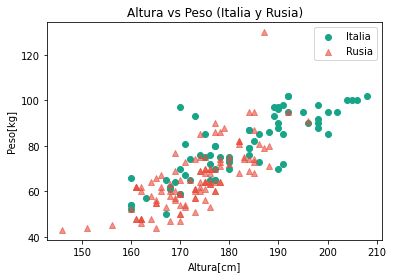

In [117]:
fig, ax = plt.subplots()

ax.scatter(italia["altura"],italia["peso"], label = "Italia", color = "#17A589")
ax.scatter(rusia["altura"],rusia["peso"], label = "Rusia",color = "#E74C3C", alpha = 0.6, marker='^')
ax.set_xlabel("Altura[cm]")
ax.set_ylabel("Peso[kg]")
ax.set_title("Altura vs Peso (Italia y Rusia)")
ax.legend()
plt.show()

#### <span style='color:#D4AC0D'>Gráficos de dispersión en series temporales</span></center>

Grafiquemos ahora los valores de temperatura relativa para los datos que van desde 1990/1999 y desde 2000/2009 de nuestro set de datos *cambioClima*.

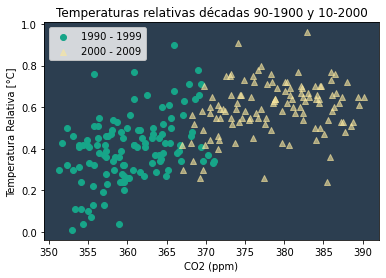

In [118]:
#obtenemos datos para las fechas propuestas
decada90_1900 = cambioClima["1990-01-01":"1999-12-31"]
decada10_2020 = cambioClima["2000-01-01":"2009-12-31"]
fig, ax = plt.subplots()

ax.scatter(decada90_1900["co2"], decada90_1900["tempRelativa"],
color="#17A589", label="1990 - 1999")

ax.scatter(decada10_2020["co2"], decada10_2020["tempRelativa"],
color = "#F9E79F", alpha = 0.6, marker='^', label="2000 - 2009")

ax.set_facecolor("#2C3E50") #color de fondo

ax.set_title("Temperaturas relativas décadas 90-1900 y 10-2000")
ax.legend()
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Temperatura Relativa [°C]")
plt.show()

**Prestar atención** a algunos parámetros seteados. Como marcadores usados, color de fondo, entre otros.

Como vemos, el poder de costumización que posee matplotlib es elevado (y eso que no hemos visto otros parámetros para customizar).

#### <span style='color:#D4AC0D'>Agregando una tercera variable para codificar los colores</span></center>

En algunos casos es posible *codificar* los colores del scatter plot utilizando una tercer variable.

Veamos esto usando los datos de cambio climático.

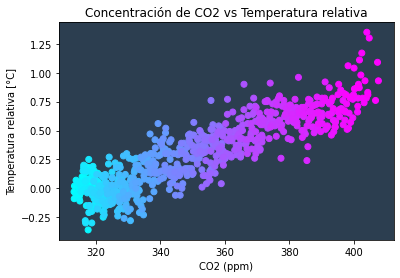

In [122]:
fig, ax = plt.subplots()
ax.scatter(cambioClima["co2"], cambioClima["tempRelativa"],
           c=cambioClima.index, cmap='cool')

ax.set_facecolor("#2C3E50") #color de fondo

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Temperatura relativa [°C]")
ax.set_title("Concentración de CO2 vs Temperatura relativa")

plt.show()

**Comentario**

Notar que hemos hecho `c = cambioClima.index`, es decir, los colores de cada punto serán diferentes para todos ellos, a pesar de que a simple vista algunos colores parecen ser los mismos, lo que hace matplotlib es "mapear" los valores. Dado que tenemos muchos valores, el pasaje de un color a otro es tan pequeño que no deja discriminar entre colores. No obstante, entre los primeros valores de CO2 hasta los últimos, vemos un claro aumento, tanto de la concentración de CO2, como de temperatura, indicando una correlación positiva entre ambas variables. Podríamos inferir, al menos con estos datos, que el aumento de CO2 es causante del aumento de temperatura a nivel mundial.

**Pero antes de sacar una conclusión adcuada debemos realizar mayores estudios**.

Los colores que nos ofrece matplotlib para setear el mapa de colores son:

>'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

# Continúa en la próxima clase...

<hr style="border:1px solid #55E227"> </hr>

### FIN